In [149]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.feature_extraction.text import CountVectorizer


from sklearn.cross_validation import train_test_split
import sklearn
%matplotlib notebook

In [4]:
with open('data/dataset.json', 'r') as f:
    data = json.load(f)

In [13]:
data[0]['username']

'kissinfashion'

In [23]:
df = pd.DataFrame(data[0]['posts']['annotations'])

TypeError: list indices must be integers or slices, not str

In [22]:
df.head()

,annotations,instagram,updated
0,"{'labelAnnotations': [{'mid': '/m/0138tl', 'de...","{'__typename': 'GraphImage', 'id': '1475702346...",1490138104
1,"{'labelAnnotations': [{'mid': '/m/04g3r', 'des...","{'__typename': 'GraphImage', 'id': '1475641947...",1490138104
2,{'faceAnnotations': [{'boundingPoly': {'vertic...,"{'__typename': 'GraphImage', 'id': '1475581054...",1490138104
3,"{'labelAnnotations': [{'mid': '/m/0c_jw', 'des...","{'__typename': 'GraphImage', 'id': '1475520659...",1490138104
4,{'faceAnnotations': [{'boundingPoly': {'vertic...,"{'__typename': 'GraphImage', 'id': '1475432390...",1490138104


In [28]:
data[0]['posts'][0]['instagram']['likes']

{'count': 1351}

In [34]:
posts = [ post['instagram']['likes'] for post in user['posts'] for user in data ]

NameError: name 'user' is not defined

In [53]:
struct = ([[user['id'], post['instagram']['likes']['count']]  for user in data for post in user['posts']])

In [56]:
df = pd.DataFrame(struct)
df.columns = ['id', 'likes']
df

,id,likes
0,528405678,1351
1,528405678,8831
2,528405678,16879
3,528405678,16305
4,528405678,12959
5,528405678,14318
6,528405678,16631
7,528405678,17834
8,528405678,23733
9,528405678,21505


<IPython.core.display.Javascript object>


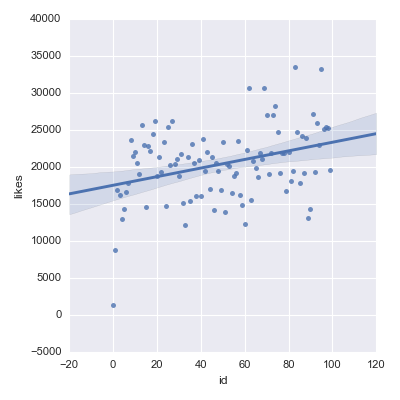

In [87]:
sns.lmplot(x='id', y='likes', data=first.iloc[0:100])

In [86]:
first.iloc[0:100]

,id,likes
0,0,1351
1,1,8831
2,2,16879
3,3,16305
4,4,12959
5,5,14318
6,6,16631
7,7,17834
8,8,23733
9,9,21505


In [79]:
first = df[df['id'] == '528405678']
first['id'] = list(range(0, 1007))

/Users/ozeron/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [105]:
[post['annotations'].get('labelAnnotations') for post in data[0]['posts']]

[[{'description': 'toy', 'mid': '/m/0138tl', 'score': 0.7298175},
  {'description': 'product', 'mid': '/m/01jwgf', 'score': 0.7241738},
  {'description': 'teddy bear', 'mid': '/m/0kmg4', 'score': 0.71565104},
  {'description': 'interaction', 'mid': '/m/01ckgp', 'score': 0.57283795},
  {'description': 'stuffed toy', 'mid': '/m/021mh_', 'score': 0.565098},
  {'description': 'textile', 'mid': '/m/0dnr7', 'score': 0.5362033},
  {'description': 'hug', 'mid': '/m/025s9qt', 'score': 0.51613253},
  {'description': 'fur', 'mid': '/m/0cnmr', 'score': 0.5012632}],
 [{'description': 'leisure', 'mid': '/m/04g3r', 'score': 0.95009357},
  {'description': 'swimming pool', 'mid': '/m/0b_rs', 'score': 0.9242231},
  {'description': 'vacation', 'mid': '/m/02jwqh', 'score': 0.8637947},
  {'description': 'resort', 'mid': '/m/02dkrm', 'score': 0.7960302},
  {'description': 'caribbean', 'mid': '/m/0261m', 'score': 0.79032457},
  {'description': 'water park', 'mid': '/m/01wt5r', 'score': 0.64737475},
  {'descr

In [114]:
id_labels = [
    [post['instagram']['likes']['count'],
    (' ').join(
        [annotation['description'] for annotation in post['annotations'].get('labelAnnotations', [])]
    )] for post in data[0]['posts']]

In [124]:
idLabels = pd.DataFrame(id_labels)
idLabels.columns = ['likes', 'annotations']

In [125]:
idLabels

,likes,annotations
0,1351,toy product teddy bear interaction stuffed toy...
1,8831,leisure swimming pool vacation resort caribbea...
2,16879,hair clothing black hair hairstyle long hair b...
3,16305,furniture room shelving shelf closet wardrobe ...
4,12959,clothing vacation beauty swimwear sun tanning ...
5,14318,white black clothing blue footwear tights dres...
6,16631,hair clothing lady jacket black hair hairstyle...
7,17834,clothing image footwear red fashion spring inf...
8,23733,clothing blue denim footwear jeans outerwear p...
9,21505,clothing footwear fashion glasses spring patte...


In [130]:
cv = CountVectorizer()
lr = LinearRegression()

In [133]:
X_train, X_test, y_train, y_test = train_test_split(idLabels['annotations'], idLabels['likes'], test_size=0.2, random_state=0)

In [134]:
cv.fit(X_train, y_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [135]:
lr.fit(cv.transform(X_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
predict = lr.predict(cv.transform(X_test))

In [138]:
lr.score(cv.transform(X_test), y_test)

-0.57780029890440798

In [150]:
sklearn.metrics.mean_squared_error(y_test, predict)

48931452.98818247

<IPython.core.display.Javascript object>


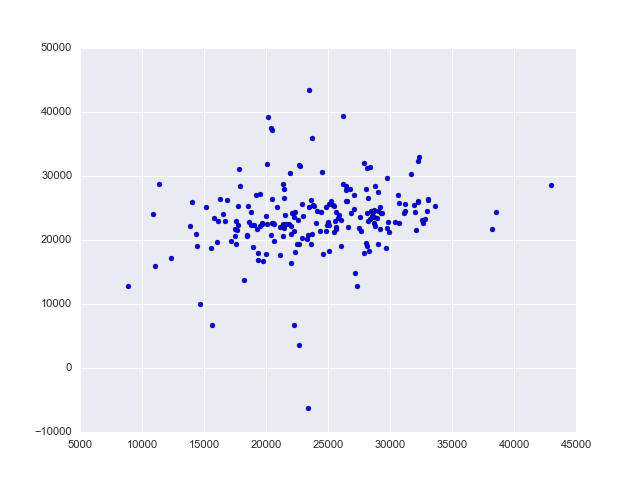

In [148]:
plt.scatter(y_test, predict)
#plt.scatter(range(len(y_test)), predict)